# PREGUNTA 1

In [62]:
import pandas as pd
import matplotlib as plt
import numpy as np

#Load the database
path = "C:/Users/sbece/Downloads/ML data/desafio_spike_cuencas-master/desafio_spike_cuencas-master/caudal_extra.csv"
datos = pd.read_csv(path, delimiter = ",")
datos.head(5)
datos = datos.drop('Unnamed: 0', axis = 1)
datos.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN


In [63]:
datos.dtypes

codigo_estacion             int64
institucion                object
fuente                     object
nombre                     object
altura                      int64
latitud                   float64
longitud                  float64
codigo_cuenca               int64
nombre_sub_cuenca          object
cantidad_observaciones      int64
fecha                      object
caudal                    float64
gauge_id                    int64
gauge_name                 object
precip_promedio           float64
temp_max_promedio         float64
dtype: object

In [64]:
#Convert fecha to datetime and delete hours, minutes and seconds
from datetime import datetime

datos['fecha'] = pd.to_datetime(datos['fecha'])
#datos['fecha'] = pd.to_datetime(datos['fecha']).dt.date
print (datos['fecha'].head().apply(type))

#extract months and days
#datos['month'] = pd.DatetimeIndex(datos['fecha']).month
#datos['day'] = pd.DatetimeIndex(datos['fecha']).day
#datos.head()

0    <class 'pandas._libs.tslibs.timestamps.Timesta...
1    <class 'pandas._libs.tslibs.timestamps.Timesta...
2    <class 'pandas._libs.tslibs.timestamps.Timesta...
3    <class 'pandas._libs.tslibs.timestamps.Timesta...
4    <class 'pandas._libs.tslibs.timestamps.Timesta...
Name: fecha, dtype: object


# PREGUNTA 2

In [65]:
##Summary - statistics
datos.describe()

,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


In [66]:
#Get the categorical variables
describe = datos.describe()
cols = datos.columns
num_cols = datos._get_numeric_data().columns
print(num_cols) ##numerical variables
categorias = list(set(cols) - set(num_cols))
print(categorias)

Index(['codigo_estacion', 'altura', 'latitud', 'longitud', 'codigo_cuenca',
       'cantidad_observaciones', 'caudal', 'gauge_id', 'precip_promedio',
       'temp_max_promedio'],
      dtype='object')
['institucion', 'nombre', 'nombre_sub_cuenca', 'fuente', 'fecha', 'gauge_name']


In [67]:
#Missing values
datos.isnull().values.any() #is there any NaN value?
datos.isnull() ## rows with na values
datos.isnull().sum() ##total number of missing values by variable

codigo_estacion                0
institucion                    0
fuente                         0
nombre                         0
altura                         0
latitud                        0
longitud                       0
codigo_cuenca                  0
nombre_sub_cuenca              0
cantidad_observaciones         0
fecha                          0
caudal                         0
gauge_id                       0
gauge_name                     0
precip_promedio            27767
temp_max_promedio         151563
dtype: int64

In [68]:
##there are many missing values in the variables precip_promedio and temp_max_promedio
## let's take a look at those variables
datos["precip_promedio"].isnull()
datos["temp_max_promedio"].isnull()

##Podemos concluir que hay estaciones que no tienen estaciones para medir la temperatura y precipitación. Por ello, se decidió
##por simplicidad, eliminar estas observaciones.

0           True
1           True
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21          True
22          True
23          True
24          True
25          True
26          True
27          True
28          True
29          True
           ...  
1411150    False
1411151    False
1411152    False
1411153    False
1411154    False
1411155    False
1411156    False
1411157    False
1411158    False
1411159    False
1411160    False
1411161    False
1411162    False
1411163    False
1411164    False
1411165    False
1411166    False
1411167    False
1411168    False
1411169    False
1411170    False
1411171    False
1411172    False
1411173    False
1411174    False
1411175    False
1411176    False
1411177    Fal

In [69]:
##drop missing values
datos = datos.dropna()
datos.isnull().sum() 

codigo_estacion           0
institucion               0
fuente                    0
nombre                    0
altura                    0
latitud                   0
longitud                  0
codigo_cuenca             0
nombre_sub_cuenca         0
cantidad_observaciones    0
fecha                     0
caudal                    0
gauge_id                  0
gauge_name                0
precip_promedio           0
temp_max_promedio         0
dtype: int64

In [70]:
#Histograms
##First of all, we must get all numerical variables
#num_cols = datos.columns[datos.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num = datos[num_cols]
print(num.head())
##codigo_estacion should be a categorical variable or dummy variable so keep that in mind.

    codigo_estacion  altura  latitud   longitud  codigo_cuenca  \
32          4540001     310 -30.6833 -71.050003             45   
33          4540001     310 -30.6833 -71.050003             45   
34          4540001     310 -30.6833 -71.050003             45   
35          4540001     310 -30.6833 -71.050003             45   
36          4540001     310 -30.6833 -71.050003             45   

    cantidad_observaciones  caudal  gauge_id  precip_promedio  \
32                   11575    77.0   4540001              0.0   
33                   11575    51.2   4540001              0.0   
34                   11575    56.9   4540001              0.0   
35                   11575    81.9   4540001              0.0   
36                   11575    50.4   4540001              0.0   

    temp_max_promedio  
32               21.5  
33               20.5  
34               22.0  
35               20.5  
36               28.5  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA210AAF98>,
      dtype=object)

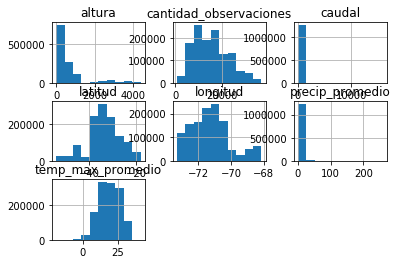

In [71]:
num = num.drop(['codigo_estacion', 'codigo_cuenca', 'gauge_id'] , 1) 
num.hist()

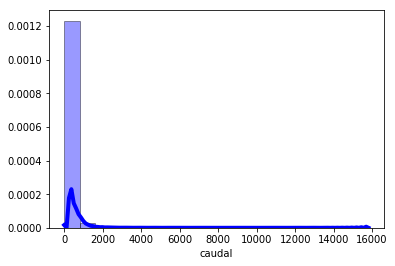

In [72]:
#Density plots
import seaborn as sns

sns.distplot(num['caudal'], hist = True, kde = True,
            bins = int(1000/50), color = 'blue',
            hist_kws = {'edgecolor' : 'black'},
            kde_kws = {'linewidth' : 4})
#Right-skewed distribution

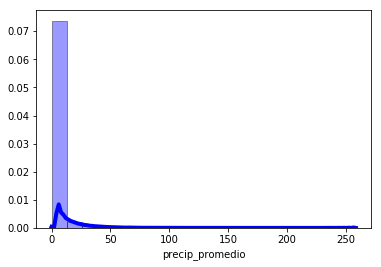

In [73]:
sns.distplot(num['precip_promedio'], hist = True, kde = True,
            bins = int(1000/50), color = 'blue',
            hist_kws = {'edgecolor' : 'black'},
            kde_kws = {'linewidth' : 4})
#Right-skewed distribution

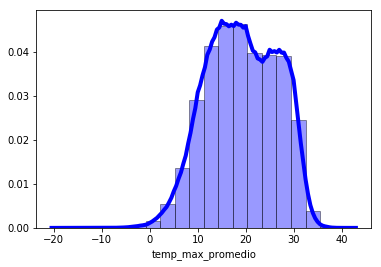

In [74]:
sns.distplot(num['temp_max_promedio'], hist = True, kde = True,
            bins = int(1000/50), color = 'blue',
            hist_kws = {'edgecolor' : 'black'},
            kde_kws = {'linewidth' : 4})

#Bimodal distribution

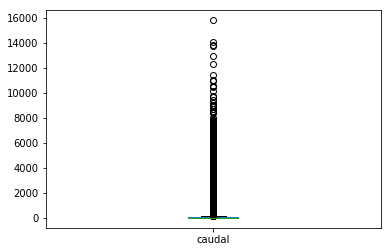

In [17]:
#boxplot by variable
import matplotlib.pyplot as plt

#num[['caudal', 'precip_promedio', 'temp_max_promedio']].plot(kind='box')
num['caudal'].plot(kind='box')

In [ ]:
num['precip_promedio'].plot(kind='box')
plt.show()

In [ ]:
num['temp_max_promedio'].plot(kind='box')
plt.show()

In [18]:
#correlation between variables
num[['caudal', 'precip_promedio', 'temp_max_promedio']].corr()

#Se podría pensar que no hay una relación de causalidad entre las variables porque sus correlaciones son bajísimas, es decir,
#no hay relación directa.

,caudal,precip_promedio,temp_max_promedio
caudal,1.000000,0.193433,-0.234023
precip_promedio,0.193433,1.000000,-0.259801
temp_max_promedio,-0.234023,-0.259801,1.000000


# PREGUNTA 3

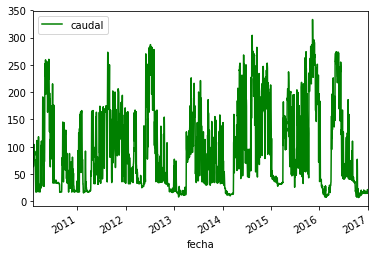

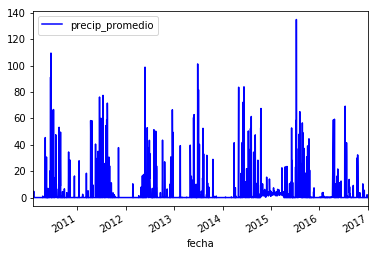

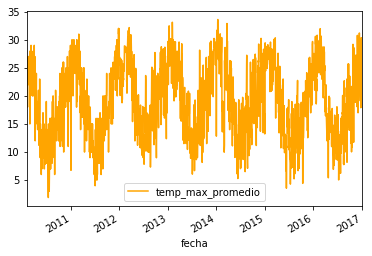

In [75]:
import matplotlib.pyplot as plt

def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max, colores):
    data = datos[datos["codigo_estacion"] == codigo_estacion]
    data = data[(data["fecha"] >= fecha_min) & (data['fecha'] <= fecha_max)]
    data.plot(x = 'fecha', y = columna, color = colores)
    plt.show() 
    
time_plot_una_estacion(7322001, 'caudal', '2010-02-03', '2017-01-01', colores = 'green')
time_plot_una_estacion(7322001, 'precip_promedio', '2010-02-03', '2017-01-01', colores = 'blue')
time_plot_una_estacion(7322001, 'temp_max_promedio', '2010-02-03', '2017-01-01', colores = 'orange')

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

#, fecha_min, fecha_max
aux = []
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    data = datos[datos["codigo_estacion"] == codigo_estacion]
    data = data[(data["fecha"] >= fecha_min) & (data['fecha'] <= fecha_max)]
    for i in range(len(columnas)):
        aux0 = columnas[i] + '_normalized'
        aux.append(aux0)
        data[aux0] = float(data[columnas[i]] - data[columnas[i]].min)/(data[columnas[i]].max - data[columnas[i]].min)
    print(type(aux))  
    data.plot(x = 'fecha', y = aux)
    plt.show() 

time_plot_estaciones_varias_columnas(7322001, ['temp_max_promedio','caudal'], '2010-02-03', '2017-01-01')

AssertionError: <class 'method'>

# PREGUNTA 4

In [76]:
#extract years, months and days
datos['year'] = pd.DatetimeIndex(datos['fecha']).month
datos['month'] = pd.DatetimeIndex(datos['fecha']).month
datos['day'] = pd.DatetimeIndex(datos['fecha']).day
print(datos.head())

#https://datatofish.com/if-condition-in-pandas-dataframe/
def estaciones(row):
    if row['month'] <= 2:
        return 'Verano'
    elif row['month'] > 9 and row['month'] < 12:
        return 'Primavera'
    elif row['month'] >= 4 and row['month'] < 6:
        return 'Otoño'
    elif row['month'] >= 7 and row['month'] < 9:
        return 'Invierno'
    elif row['month'] == 3:
        if row['day'] <= 20:
            return 'Verano'
        else:
            return 'Otoño'
    elif row['month'] == 6:
        if row['day'] <= 21:
            return 'Otoño'
        else:
            return 'Invierno'
    elif row['month'] == 9:
        if row['day'] <= 23:
            return 'Invierno'
        else:
            return 'Primavera'
    elif row['month'] == 12:
        if row['day'] <= 21:
            return 'Primavera'
        else:
            return 'Verano'    
    else:
        return 'Error. Fecha incorrecta.'

datos['Estacion'] = datos.apply(estaciones, axis=1)
##number of observations by season
print(pd.value_counts(datos.Estacion))

    codigo_estacion institucion   fuente                  nombre  altura  \
32          4540001         DGA  dga_web  Rio Grande En Paloma 1     310   
33          4540001         DGA  dga_web  Rio Grande En Paloma 1     310   
34          4540001         DGA  dga_web  Rio Grande En Paloma 1     310   
35          4540001         DGA  dga_web  Rio Grande En Paloma 1     310   
36          4540001         DGA  dga_web  Rio Grande En Paloma 1     310   

    latitud   longitud  codigo_cuenca  \
32 -30.6833 -71.050003             45   
33 -30.6833 -71.050003             45   
34 -30.6833 -71.050003             45   
35 -30.6833 -71.050003             45   
36 -30.6833 -71.050003             45   

                                 nombre_sub_cuenca  cantidad_observaciones  \
32  Rio Grande Bajo (Entre E Paloma Y Rio Hurtado)                   11575   
33  Rio Grande Bajo (Entre E Paloma Y Rio Hurtado)                   11575   
34  Rio Grande Bajo (Entre E Paloma Y Rio Hurtado)            

In [77]:
##Group the data by season
is_ver =  datos['Estacion'] == 'Verano' 
verano = datos[is_ver]
is_ot =  datos['Estacion'] == 'Otoño' 
otono = datos[is_ot]
is_inv =  datos['Estacion'] == 'Invierno' 
invierno = datos[is_inv]
is_pri =  datos['Estacion'] == 'Primavera' 
primavera = datos[is_pri]

def extremo(estacion):
    percentil1 = np.percentile(estacion['caudal'], 95)
    percentil2 = np.percentile(estacion['temp_max_promedio'], 95)
    percentil3 = np.percentile(estacion['precip_promedio'], 95)
    estacion.loc[estacion.caudal > percentil1, 'caudal_extremo'] = 1
    estacion.loc[estacion.caudal <= percentil1, 'caudal_extremo'] = 0
    estacion.loc[estacion.temp_max_promedio > percentil2, 'temp_extremo'] = 1
    estacion.loc[estacion.temp_max_promedio <= percentil2, 'temp_extremo'] = 0
    estacion.loc[estacion.precip_promedio > percentil3, 'precip_extremo'] = 1
    estacion.loc[estacion.precip_promedio <= percentil3, 'precip_extremo'] = 0

#databases with new values
extremo(verano)
extremo(otono)
extremo(invierno)
extremo(primavera)



C:\Users\sbece\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sbece\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [78]:
#concatenate the DataFrames
seasons = pd.concat([verano, otono, invierno, primavera])
seasons.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,...,gauge_name,precip_promedio,temp_max_promedio,year,month,day,Estacion,caudal_extremo,temp_extremo,precip_extremo
37,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,25.000000,2,2,4,Verano,0.0,0.0,0.0
42,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,20.000000,3,3,15,Verano,0.0,0.0,0.0
46,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,26.000000,1,1,11,Verano,0.0,0.0,0.0
47,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,23.900000,2,2,24,Verano,0.0,0.0,0.0
48,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,26.866667,2,2,28,Verano,0.0,0.0,0.0


# PREGUNTA 5

In [25]:
#seasons[["codigo_estacion", "caudal_extremo"]].describe()

#seasons.groupby(['codigo_estacion'])['caudal_extremo'].describe()[['count', 'mean']]
#seasons.groupby(['codigo_estacion'])['caudal_extremo'].value_counts()

seasons1 = seasons[seasons['caudal_extremo'] == 1]
seasons1.groupby(['gauge_name'])['caudal_extremo'].value_counts()


##Se puede observar que la cantidad de caudal extremo por zona geográfica varia considerablemente, ya que por ejemplo si
##comparamos las cuencas del río Aysén en Puerto Aysén con el río Ancoa en El Morro (Linares) es garrafal, así como también
##lo es entre el río Biobio en Desembocadura y el río Choapa (Coquimbo).
##Tal vez sería interesante tener una variable que describa el clima donde se encuentra la cuenca para comparar valores
##extremos. 

gauge_name                                caudal_extremo
Estero Puangue En Ruta 78                 1.0                  4
Rio Aconcagua En Romeral                  1.0                  3
Rio Ancoa En El Morro                     1.0                  1
Rio Aysen En Puerto Aysen                 1.0               3261
Rio Baker Bajo ÑAdis                      1.0               3908
Rio Baker En Angostura Chacabuco          1.0               3642
Rio Baker En Colonia                      1.0               4714
Rio Baker En Desague Lago Bertrand        1.0               2848
Rio Bio Bio Ante Junta Huiri Huiri        1.0                111
Rio Bio Bio Ante Junta Pangue             1.0                195
Rio Bio Bio En Angostura Ralco 1          1.0                 17
Rio Bio-Bio En Llanquen                   1.0                 41
Rio Biobio En Coihue                      1.0               4399
Rio Biobio En Desembocadura               1.0               9243
Rio Biobio En La Culebra         

In [27]:
a = seasons1.groupby(['gauge_name'])['caudal_extremo'].value_counts()
b = seasons1['gauge_name'].value_counts()

# PREGUNTA 6

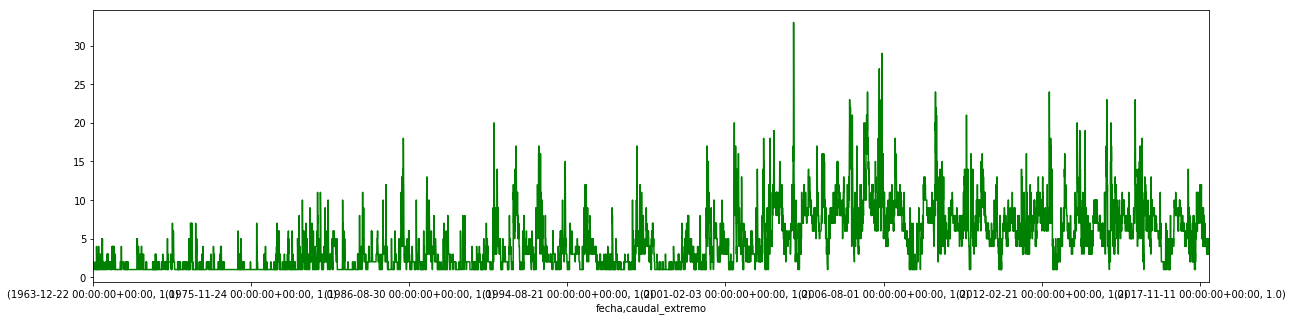

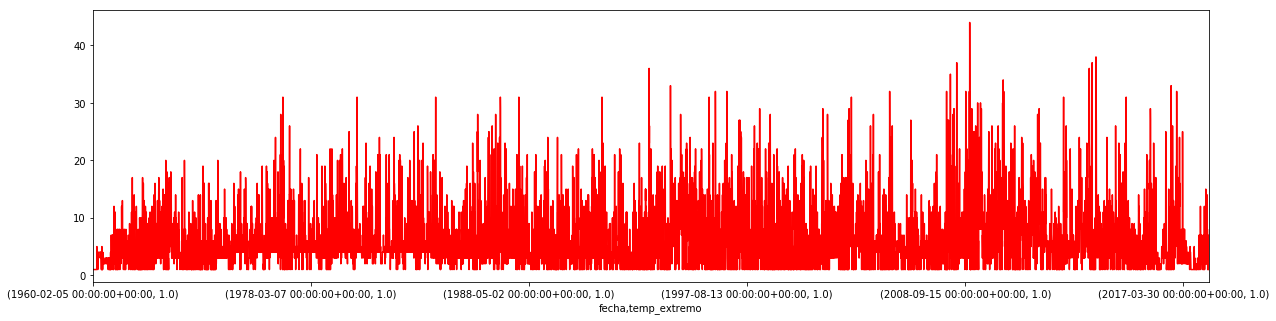

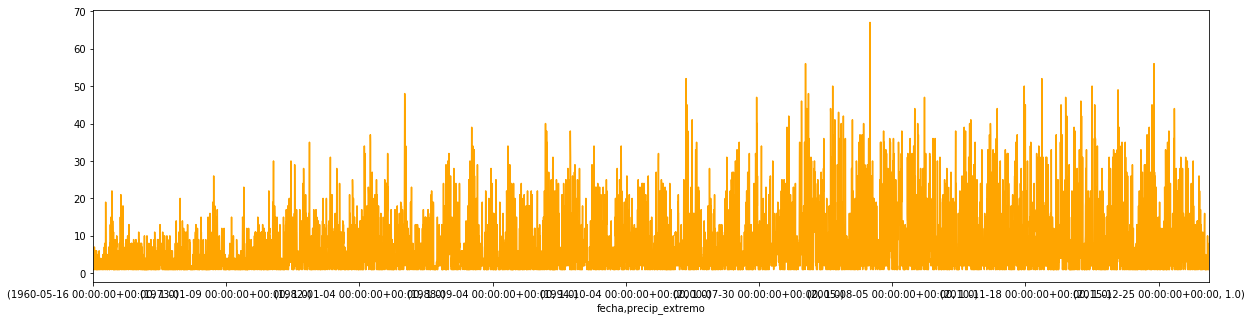

In [79]:
import matplotlib.pyplot as plt

seasons['fecha'] = pd.to_datetime(seasons['fecha']).dt.normalize()

b1 = seasons[seasons['caudal_extremo'] == 1]
a1 = b1.groupby(['fecha'])['caudal_extremo'].value_counts()
plt.figure(figsize=(20,5))
a1.plot(x ='fecha', y ='caudal_extremo', color = 'green') 
plt.show() 

b2 = seasons[seasons['temp_extremo'] == 1]
a2 = b2.groupby(['fecha'])['temp_extremo'].value_counts()
plt.figure(figsize=(20,5))
a2.plot(x ='fecha', y ='temp_extremo', color = 'red') 
plt.show()

b3 = seasons[seasons['precip_extremo'] == 1]
a3 = b3.groupby(['fecha'])['precip_extremo'].value_counts()
plt.figure(figsize=(20,5))
a3.plot(x ='fecha', y ='precip_extremo', color = 'orange') 
plt.show()

#Se puede apreciar que los eventos de caudal extremo se han hecho más comunes el último año, al igual que las temperaturas
#y precipitaciones extremas.

# PREGUNTA 7

In [30]:
##Dado que la variable caudal_extremo es binaria y las variables precip_promedio y temperatura_maxima promedio
##dependen del tiempo, no sería adecuado usar directamente un modelo de regresión logística.
seasons['caudal_extremo'].sum()
seasons['caudal_extremo'].value_counts()

0.0    1193738
1.0      62740
Name: caudal_extremo, dtype: int64

In [31]:
seasons['caudal_extremo'].sum()

62740.0

In [84]:
##A modo de ejemplo no se implementará un modelo Binary ARMA y se usarán otros algoritmos para predecir el caudal extremo.

##Antes de usar cualquier algoritmo es necesario transformar las variables categóricas a numéricas. Es por eso que se debe
## usar LabelEncoder o OneHotEnconder. Esta vez se usará OneHotEncoder porque tenemos más de dos categorías.
#Categorical boolean mask
#X = seasons.drop(['caudal_extremo', 'institucion' ,'fuente', 'nombre_sub_cuenca', 'gauge_name', 'nombre', 'fecha'], axis = 1)
#print(X.dtypes)
#y = seasons['caudal_extremo']
categorical_feature_mask = seasons.dtypes == object
#filter categorical columns using mask and turn it into a list
categorical_cols = seasons.columns[categorical_feature_mask].tolist()

#LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#apply le on categorical feature columns
seasons[categorical_cols] = seasons[categorical_cols].apply(lambda col: le.fit_transform(col))
print(seasons[categorical_cols].head())

#OneHotEncoder
#from sklearn.preprocessing import OneHotEncoder

#ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse = False)
#seasons = ohe.fit_transform(seasons)
print(seasons.head())

ValueError: Must have equal len keys and value when setting with an iterable

In [83]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse = False)
seasons_ohe = ohe.fit_transform(seasons.drop(['fecha'], axis = 1))

C:\Users\sbece\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\sbece\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 22 but corresponding boolean dimension is 23

In [ ]:
##Train the model
# Split-out validation dataset
array = datos.values
print(array.shape)
#X = array[:, ]
#Y = array[:,4]
#validation_size = 0.20
#seed = 7
#X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
import datetime

fecha_min = '2010-02-03'
#fecha_min = datetime.strptime(fecha_min, '%Y-%m-%d').date
type(fecha_min)
fecha_min = datetime.datetime.strptime(fecha_min, '%Y-%m-%d')
date_time_obj.day

In [ ]:
#datos.loc[datos['fecha'] >=  '2010-02-03'  or datos['fecha'] <= '2017-01-01']
datos[(datos["fecha"] >= '2010-02-03') & (datos['fecha'] <= '2017-01-01')]

In [36]:
seasons.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,...,gauge_name,precip_promedio,temp_max_promedio,year,month,day,Estacion,caudal_extremo,temp_extremo,precip_extremo
37,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,25.000000,2,2,4,Verano,0.0,0.0,0.0
42,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,20.000000,3,3,15,Verano,0.0,0.0,0.0
46,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,26.000000,1,1,11,Verano,0.0,0.0,0.0
47,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,23.900000,2,2,24,Verano,0.0,0.0,0.0
48,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,Rio Grande En Paloma 1,0.0,26.866667,2,2,28,Verano,0.0,0.0,0.0


In [53]:
import pandas as pd

pd.get_dummies(seasons['codigo_estacion'])

,1020003,1021001,1050004,1211001,2103003,2104002,2104003,2105001,2105002,2105005,...,11530000,11536004,11542001,11545000,11710000,11711000,12284007,12289001,12289002,12876004
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
